In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale

In [13]:
heart_data = pd.read_csv("../data/heart.csv") 
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
heart_data['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [16]:
X = heart_data.iloc[: ,0 :13].values 
Y = heart_data.iloc[: , 13].values

In [17]:
X.shape , Y.shape

((303, 13), (303,))

In [18]:
scaled_x = scale(X) 
scaled_x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [37]:
pca = PCA(n_components=13)
pca.fit(X)

PCA(n_components=13)

In [46]:
def ShowVarianceRatio(pca):
    exp_ratio_var = pca.explained_variance_ratio_
    var1 = np.cumsum(np.round(pca.explained_variance_ratio_ , decimals=4)*100)
    plt.plot(var1)  


In [39]:
exp_ratio_var = pca.explained_variance_ratio_
exp_ratio_var

array([7.47564199e-01, 1.50370221e-01, 8.45968470e-02, 1.62159604e-02,
       3.84085658e-04, 2.81234229e-04, 2.28993383e-04, 9.98328415e-05,
       7.72143117e-05, 5.87402295e-05, 5.02927817e-05, 4.09679747e-05,
       3.14113086e-05])

In [40]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

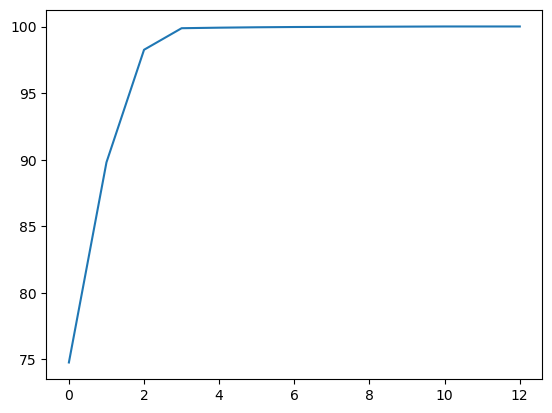

In [41]:
plt.plot(var1)
# almost 100 % of variance is explained by the first 3 components

In [42]:
pca2 = PCA(n_components=3) 
pca2.fit(X) 
X1 = pca2.fit_transform(X)

In [43]:
X1.shape

(303, 3)

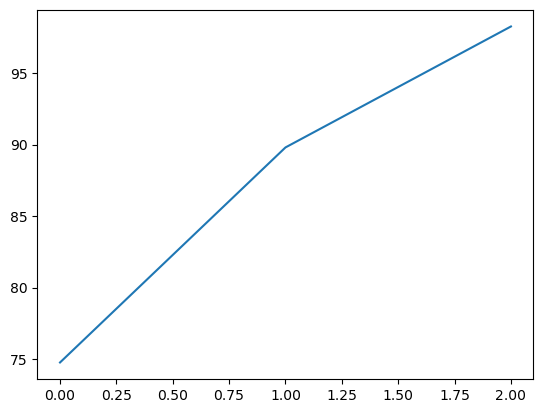

In [47]:
ShowVarianceRatio(pca2)

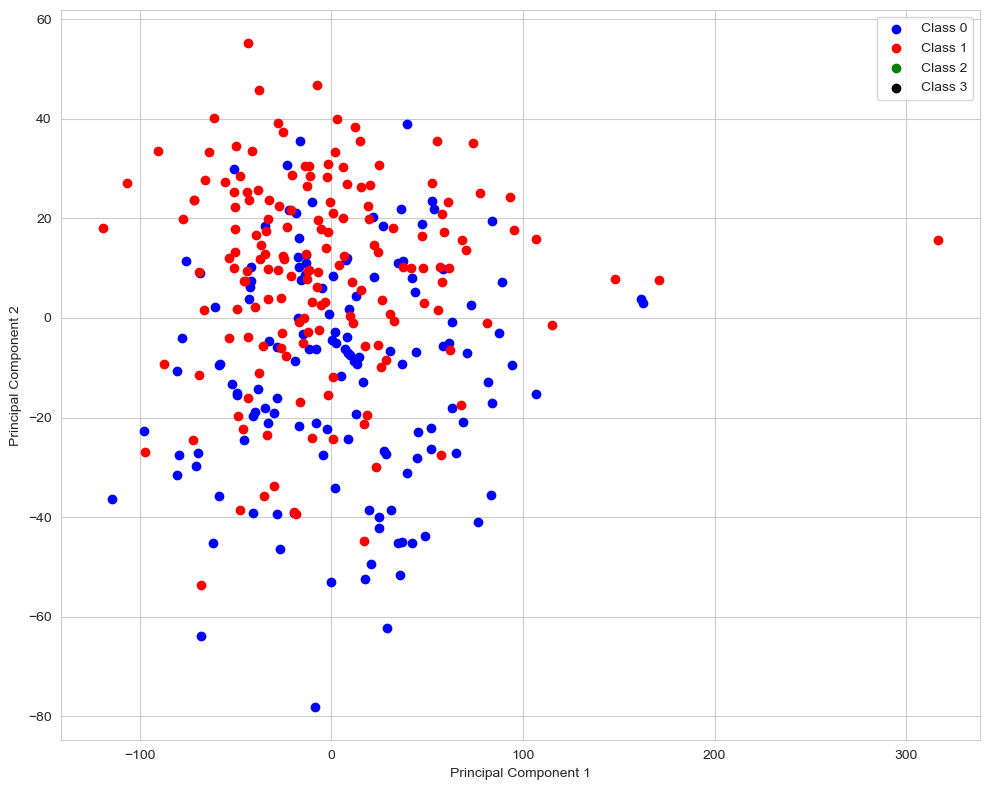

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
for lab, col in zip((0, 1, 2, 3), ('blue', 'red', 'green', 'black')):
    plt.scatter(X1[Y == lab, 0],
                X1[Y == lab, 1],
                label=f"Class {lab}",
                c=col)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.tight_layout()
plt.show()
